In [16]:
import pandas as pd
import pandahouse as ph
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

__Сравнение групп 0 и 3 по метрике линеаризованных лайков.__

In [2]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20230220',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-01-31' and '2023-02-06'
    and exp_group in (0,3)
GROUP BY exp_group, user_id
"""

df_1 = ph.read_clickhouse(q, connection=connection)

Считаем общий CTR в контрольной группе 0.

In [3]:
CTR_control_1 = df_1[df_1.exp_group == 0].likes.sum()/df_1[df_1.exp_group == 0].views.sum()

Посчитаем в обеих группах поюзерную метрику linearized_ctr.

In [4]:
df_1['linearized_ctr'] = df_1['likes'] - df_1['views'] * CTR_control_1

После чего сравним t-тестом отличия в группах по рассчитанной метрике.

In [5]:
stats.ttest_ind(df_1[df_1.exp_group == 0].linearized_ctr, df_1[df_1.exp_group == 3].linearized_ctr, equal_var=False)

Ttest_indResult(statistic=-15.21499546090383, pvalue=5.4914249479687664e-52)

Также вычислим значение pvalue по изначальным показателям ctr.

In [6]:
stats.ttest_ind(df_1[df_1.exp_group == 0].ctr, df_1[df_1.exp_group == 3].ctr, equal_var=False)

Ttest_indResult(statistic=-13.896870721904069, pvalue=1.055849414662529e-43)

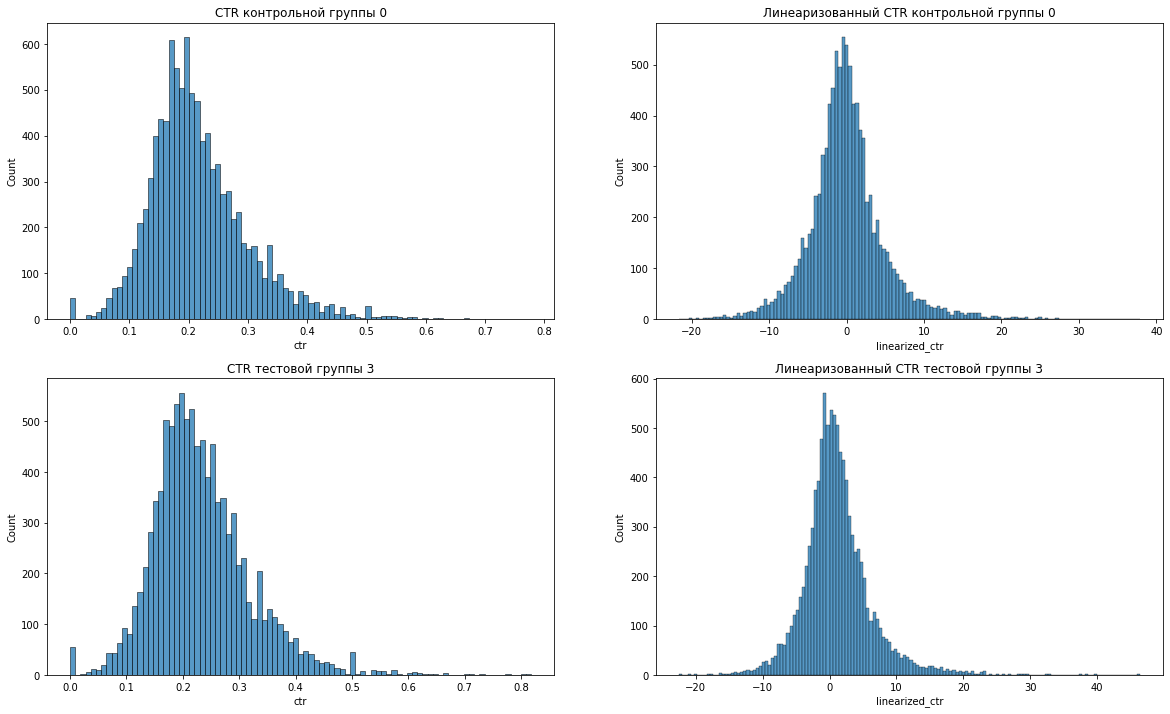

In [14]:
fig, ax = plt.subplots(2, 2, figsize=(20,12))
sns.histplot(df_1[df_1.exp_group == 0].ctr, ax=ax[0,0], kde=False)
ax[0,0].set_title('CTR контрольной группы 0')
sns.histplot(df_1[df_1.exp_group == 0].linearized_ctr, ax=ax[0,1], kde=False)
ax[0,1].set_title('Линеаризованный CTR контрольной группы 0')
sns.histplot(df_1[df_1.exp_group == 3].ctr, ax=ax[1,0], kde=False)
ax[1,0].set_title('CTR тестовой группы 3')
sns.histplot(df_1[df_1.exp_group == 3].linearized_ctr, ax=ax[1,1], kde=False)
ax[1,1].set_title('Линеаризованный CTR тестовой группы 3')
plt.show()

__Сравнение групп 1 и 2 по метрике линеаризованных лайков.__

In [8]:
connection = {'host': 'https://clickhouse.lab.karpov.courses',
                      'database':'simulator_20230220',
                      'user':'student', 
                      'password':'dpo_python_2020'
                     }

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-01-31' and '2023-02-06'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""

df_2 = ph.read_clickhouse(q, connection=connection)

Считаем общий CTR в контрольной группе 1.

In [9]:
CTR_control_2 = df_2[df_2.exp_group == 1].likes.sum()/df_2[df_2.exp_group == 1].views.sum()

Посчитаем в обеих группах поюзерную метрику linearized_ctr.

In [10]:
df_2['linearized_ctr'] = df_2['likes'] - df_2['views'] * CTR_control_2

После чего сравним  t-тестом отличия в группах по рассчитанной метрике.

In [11]:
stats.ttest_ind(df_2[df_2.exp_group == 1].linearized_ctr, df_2[df_2.exp_group == 2].linearized_ctr, equal_var=False)

Ttest_indResult(statistic=6.122579994775973, pvalue=9.439432187037712e-10)

Также вычислим значение pvalue по изначальным показателям ctr.

In [12]:
stats.ttest_ind(df_2[df_2.exp_group == 1].ctr, df_2[df_2.exp_group == 2].ctr, equal_var=False)

Ttest_indResult(statistic=0.7094392041270485, pvalue=0.4780623130874935)

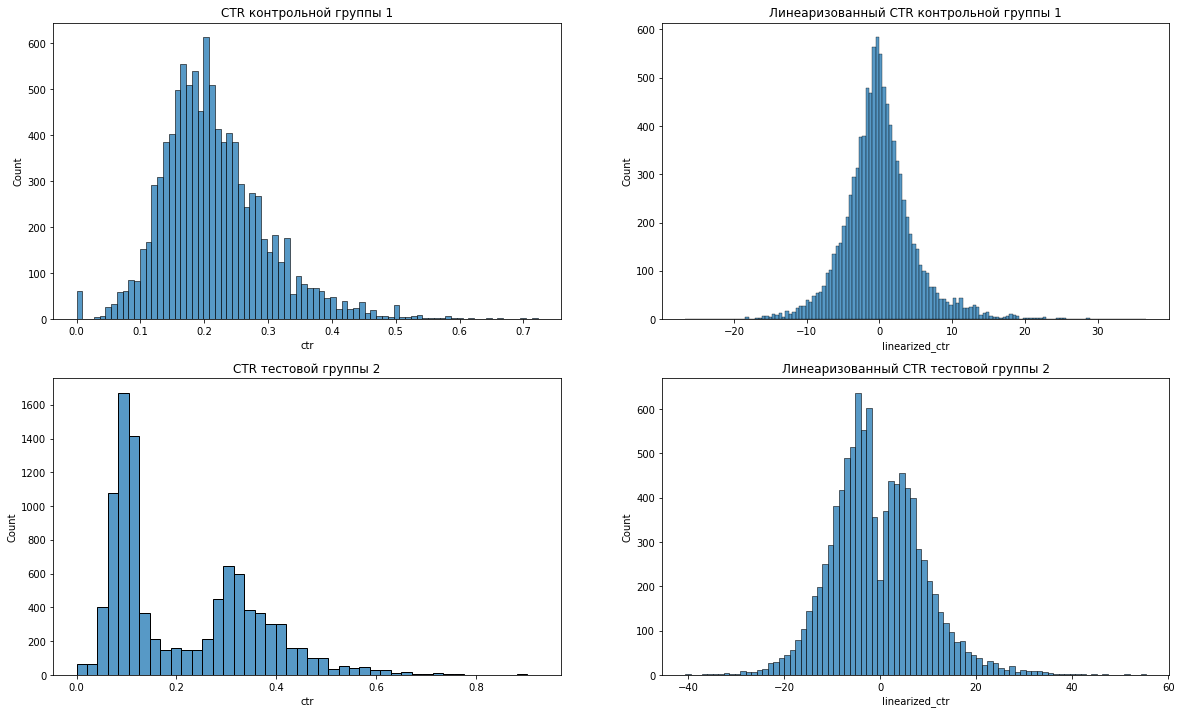

In [15]:
fig, ax = plt.subplots(2, 2, figsize=(20,12))
sns.histplot(df_2[df_2.exp_group == 1].ctr, ax=ax[0,0], kde=False)
ax[0,0].set_title('CTR контрольной группы 1')
sns.histplot(df_2[df_2.exp_group == 1].linearized_ctr, ax=ax[0,1], kde=False)
ax[0,1].set_title('Линеаризованный CTR контрольной группы 1')
sns.histplot(df_2[df_2.exp_group == 2].ctr, ax=ax[1,0], kde=False)
ax[1,0].set_title('CTR тестовой группы 2')
sns.histplot(df_2[df_2.exp_group == 2].linearized_ctr, ax=ax[1,1], kde=False)
ax[1,1].set_title('Линеаризованный CTR тестовой группы 2')
plt.show()

__ВЫВОД__

В обоих случаях значения pvalue стали значительно меньше. По построенным графикам можно заметить, что линеаризация ctr приводит наши показтели ближе к нормальному распределению, с модой равной нулю. При этом распределение линеаризованных ctr для тестовой группы 2 все равно остается бимодальным.